<p style="text-align:left;"><img src="https://raw.githubusercontent.com/javierjevf/imdbNLP/master/movie3.png" alt="Drawing" style="width: 400px;"/></p>

<h1 style='text-align: center;'> Natural Language Processing </h1>
<a href='https://github.com/javierjevf'><h4 style='text-align: center;'> Javier Vázquez</h4> </a>

<p style="text-align:right;"><img src="https://raw.githubusercontent.com/javierjevf/imdbNLP/master/movie1.png" alt="Drawing" style="width: 400px;"/></p>

## Objectives:

1. Working with the IMDB's review dataset.
2. Use NLTK tools and Pandas to extract relevant information from the database.
3. Create visualizations to explore data and provide useful insight.
4. Train a model to classify a review (or a text related to movies) into a positive or negative class.
5. Improve model efficiency using a word tokenization approach.
6. Train a TF-IDF model with the tokens implementation.
7. Implement sentiment analysis methodology.




## Loading requirements

In this project, which kind off seem like my personal notes on *Natural Languaje Processing*, I will be using the IMDB Dataset found on Kaggle. For further informaton on this please be sure to hop in: <https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews>. The dataset consists on rouughly 50 thousand reviews gathered from IMDB. 

The first step is to sort out our *data*. In this case, it consists on finding out the best way to represent a text review, so that the Machine Learning algorithm can interpret it better and work with that representation mnathematically. The libraries I'll be using the most are Pandas to handle and wrangle the data, Pyplot and Seaborn for visualizations, Numpy for out math-related needs, NLTK for text analysis and feature extraction and SciKit Learn for the Machine Learning and some text processing algorithms. 

Lets load the data and apply some pre-processing to the text. Mainly, the idea is to remove markers that may cause unnecessary noise on the classification or analysis. Right now let's remove punctuation marks and convert every single character into lower case. Afterwards we will remove every word which doesn't add any value to the bag of words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import  WordCloud
from PIL import Image
import pickle
import string
import nltk 
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
# nltk.download('averaged_perceptron_tagger')


%matplotlib inline
sns.set_style("whitegrid")

# Loading the original database
# movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc).lower()
    
    # Now just remove any stopwords
    # [print(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    # return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return nopunc

# movies["review_nopunc"] = movies.review.apply(text_process)
# movies["review_clean"] = movies.review_nopunc.apply(lambda x: [word for word in x.split() if word.lower() not in stopwords.words('english')])

movies = pd.read_csv("clean_movies_database.csv",index_col=False)#.drop(["review","review_nopunc"],axis=1)
movies.review_clean = movies.review_clean.apply(lambda x: [word.strip(''' "[']''') for word in x.split(",")]) 

## EDA

This is the first 

AxesSubplot(0.125,0.125;0.775x0.755)
positive    24884
negative    24698
Name: sentiment, dtype: int64


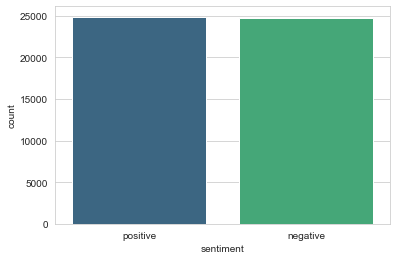

In [2]:
print(sns.countplot(data=movies.sentiment,x=movies.sentiment,palette="viridis"))
print(movies.sentiment.value_counts())

From the last computation it can be gathered that the database is balanced between positive and negative labels. This is great because it means that it won't be necessary to develop any algorithm to extrapolate labels out of the text

<AxesSubplot:ylabel='Frequency'>

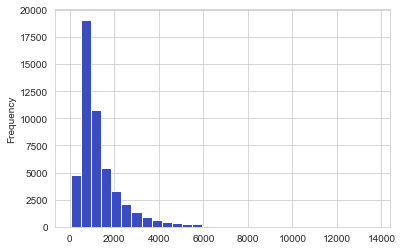

In [3]:
movies["length"]  = movies.review.apply(len)
movies.length.plot(bins=30,kind="hist",colormap="coolwarm")

<AxesSubplot:xlabel='sentiment', ylabel='review'>

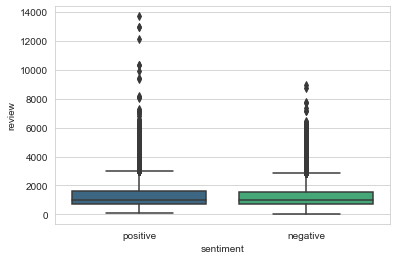

In [4]:
sns.boxplot(data=movies,x="sentiment",y=movies.review.apply(len),palette="viridis")

<AxesSubplot:xlabel='sentiment', ylabel='review'>

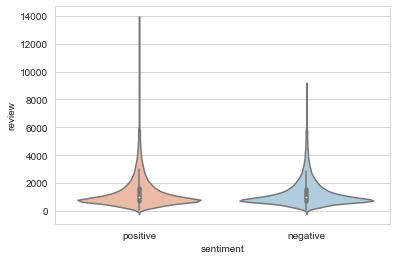

In [5]:
sns.violinplot(data=movies,x="sentiment",y=movies.review.apply(len),palette="RdBu")

In [6]:
movies.length.describe()

count    49582.000000
mean      1310.568230
std        990.762238
min         32.000000
25%        699.000000
50%        971.000000
75%       1592.000000
max      13704.000000
Name: length, dtype: float64

After very little feature engineering, we can extract the length of every review and assign it to every review. With this we're able to  tell that most messages' length range from 340 characters to 2301. There are significant outliers to this, but the mean length of the messages is 1310. 

## Creating a WordCloud 

One very intuitive way to present text data is by a word cloud, which is like a collage of words relating to each other. A word cloud is an "image" of words, commonly used to be a representation of the most common or relevant words found in a data set. We can use a library in Python called **wordcloud** which provides a lot of tinkering around different parameters when creating one of these word cloud figures. 

For this exercise I'll show an example using a predefined shape. Given that we're using a movie data set, we can use an image of some popcorn to server as the contour of our figure. Some parts of the following code will help to visualize the frequency of some words, but later it will be used on lemmas and different tokenization techniques for a more in-depth analysis. 

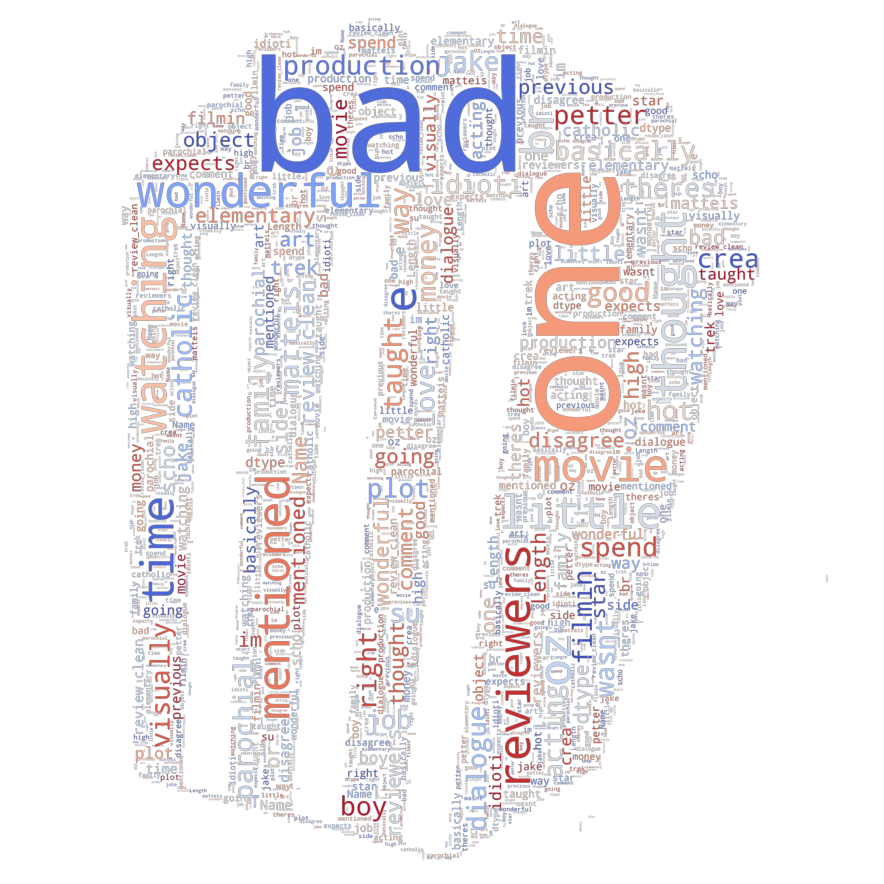

In [7]:
# Setting the size of the figure to be shown in the notebook
plt.figure(figsize=(18, 16))

# Array to create a mask used for the wordcloud. 
mask = np.array(Image.open(r"C:\Users\javie\Desktop\Python\Portfolio\imdbNLP\photo.png"))

# Create a WordCloud object that will get the parameters for editing and styling the word cloud.
cloud = WordCloud(background_color=None,
                prefer_horizontal=.5,
                colormap="coolwarm",
                stopwords = stopwords.words('english'),
                height=1080,width=1920,
                max_words=2000,
                mode = "RGBA",
                scale=4,
                # max_font_size=200,
                # relative_scaling=.8,
                repeat=True,
                # collocations= True,
                mask=mask,
                margin=1)
                
cloud.generate_from_text(str(movies.review_clean).replace("'",""))
for item in ["bad","br","oz","e","su","review_clean","Length","dtype","object"]:    
    cloud.words_.pop(item)
# cloud.generate(str(movies.review_clean[0:20000]).replace("'",""))
# cloud.to_file("movie3.png")

# Final editing on the PyPlot object which WordCloud works for as a wrapper.
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Keep reading on this subject on:

    https://www.datacamp.com/community/tutorials/wordcloud-python

## Lemmatization

There are many different ways to pre-process the data. One of the first steps taken on this dataset was removing stopwords and some punctuation marks. Lemmatization is an algorithm which will take in a word and assign it to its root. This is very similar to stemming, which is the process of removing suffixes and prefixes to get the "raw" basis of the word.

This is a bit more complex than my over-simplification but the result may vary depending on which kind of root you want to shift the bag of words to. You may either lemmatize to nouns, adjectives or verbs, which means that some words will be switched to the infinitive form if its a verb, plural and some suffixes if its a noun and simplify the adjectives. Using a lemmatizer may provide a different result depending on the project, but the best thing about using it, is that it returns an actual word. Thus, it will be simpler and cleaner to interpret it.  

Doing this will change the data set we're using in more than one way.

## Plotting distribution of occurences

['one', 'reviewers', 'mention', 'watch', '1', 'oz', 'episode', 'youll', 'hook', 'right']
['one', 'reviewers', 'mentioned', 'watching', '1', 'oz', 'episode', 'youll', 'hooked', 'right']
['one', 'reviewer', 'mentioned', 'watching', '1', 'oz', 'episode', 'youll', 'hooked', 'right']


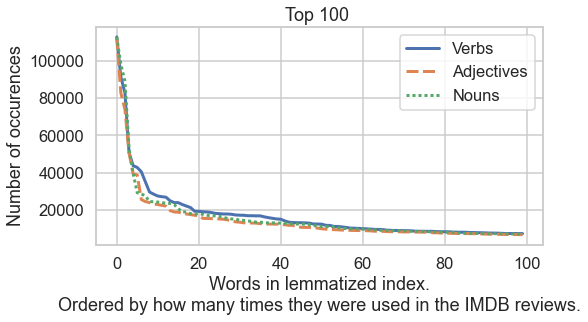

In [8]:
# Create an instance of the lemmatizer to be used and create variables which will hold the different lemmatized database.
lemmatizer = WordNetLemmatizer()

bag_of_verbs = []
bag_of_nouns = []
bag_of_adjectives = []

for i in range(len(movies["review_clean"])):
    for word in movies["review_clean"][i]:
        word1 = lemmatizer.lemmatize(word,pos="v")
        word2 = lemmatizer.lemmatize(word,pos="a")
        word3 = lemmatizer.lemmatize(word,pos="n")
        bag_of_verbs.append(word1)
        bag_of_adjectives.append(word2)
        bag_of_nouns.append(word3)
    # print(f"Row {i} done!")

print(bag_of_verbs[:10])
c_v = Counter(bag_of_verbs)
counted_verbs = c_v.most_common()
top_10_percent = int(len(counted_verbs)/10)

print(bag_of_adjectives[:10])
c_a = Counter(bag_of_adjectives)
counted_adjectives = c_a.most_common()
top_10_percent = int(len(counted_adjectives)/10)

print(bag_of_nouns[:10])
c_n = Counter(bag_of_nouns)
counted_nouns = c_n.most_common()
top_10_percent = int(len(counted_nouns)/10)

# for item in ["bad","br","oz","e","su","review_clean","Length","dtype","object"]:
#     if item in counted_adjectives.keys():
#         counted_adjectives.pop(item)


top_10_verbs = counted_verbs[0:int(top_10_percent)]
top_10_adjectives = counted_adjectives[0:int(top_10_percent)]
top_10_nouns = counted_nouns[0:int(top_10_percent)]


fx = [v for k,v in top_10_verbs[0:1600]]
fx2 = [v for k,v in top_10_adjectives[0:1600]]
fx3 = [v for k,v in top_10_nouns[0:1600]]

# fxtest = [(25000*np.sin(x/200)+50000) for x in fx[0:100]]
plt.figure(figsize=(8,4))
sns.set_theme(context='talk',
                     style='whitegrid',
                     palette='deep',
                     font='Arial',
                     font_scale=1,
                    #  color_codes=True,
                     rc={"lines.linewidth": 3})
sns.lineplot(data=[fx[0:100],fx2[0:100],fx3[0:100]])
# plt.xticks(("0","50","100","150","200","250","","","400"))
# plt.xticks(ticks=(0,50,100,150,200,250,325,400),
#             labels=(0,50,100,150,200,250,"and so...",1))
plt.title("Top 100 ")
plt.xlabel("Words in lemmatized index.\nOrdered by how many times they were used in the IMDB reviews.")
plt.ylabel("Number of occurences")
plt.legend(["Verbs","Adjectives","Nouns"])
plt.savefig("top100words.png",dpi=500,format="png",transparent=False)

## Training a model.

 This is SVM Classifier trained on half the data set. Lemmatization is very useful on the text preprocessing for building a model, for the sake of the exercise, I'll work with the bag of words made out of verbs. 

## Lemmatization on verbs

In [9]:
bag_of_verbs = []

for i in range(len(movies["review_clean"])):
    for word in movies["review_clean"][i]:
        word = lemmatizer.lemmatize(word,pos="v")
        # word = lemmatizer.lemmatize(word,pos="a")
        # word = lemmatizer.lemmatize(word,pos="n")
        bag_of_verbs.append(word)
    # print(f"Row {i} done!")

print(bag_of_verbs[:10])

c_v = Counter(bag_of_verbs)
print(c_v.most_common(20))
print(len(c_v))

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = movies.review_clean[0:25000]
y = movies.sentiment[0:25000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X.apply(str))
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train.apply(str))
y_train_vectors = vectorizer.transform(y_train.apply(str))
X_test_vectors = vectorizer.transform(X_test.apply(str))
y_test_vectors = vectorizer.transform(y_test.apply(str))
print("Train/test split fitted into the bag of words vector.\n")


model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

data_sample = movies[25001:]

X_val_vectors = vectorizer.transform(data_sample.review_clean.apply(str))
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")


['one', 'reviewers', 'mention', 'watch', '1', 'oz', 'episode', 'youll', 'hook', 'right']
[('br', 112957), ('film', 91438), ('movie', 82849), ('one', 50640), ('make', 43692), ('like', 42733), ('see', 40409), ('get', 34923), ('time', 29497), ('good', 28369), ('character', 27370), ('watch', 27003), ('go', 26734), ('even', 24833), ('would', 23826), ('think', 23796), ('really', 22778), ('story', 21948), ('show', 21160), ('well', 19159)]
168339
Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      SVC(kernel='linear')

Model fitted with training vectors.



In [ ]:
print(f" --- Classification report for {model}")
print(classification_report(data_sample.sentiment, predictions_newdata))

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86     12212
    positive       0.86      0.86      0.86     12369

    accuracy                           0.86     24581
   macro avg       0.86      0.86      0.86     24581
weighted avg       0.86      0.86      0.86     24581



In [ ]:
print(c_v.most_common(20))
print("")
print(len(c_v))

[('br', 112957), ('film', 91438), ('movie', 82849), ('one', 50640), ('make', 43692), ('like', 42733), ('see', 40409), ('get', 34923), ('time', 29497), ('good', 28369), ('character', 27370), ('watch', 27003), ('go', 26734), ('even', 24833), ('would', 23826), ('think', 23796), ('really', 22778), ('story', 21948), ('show', 21160), ('well', 19159)]

168339


## SUPER LEMMATIZED MODEL MK 1
####     a.k.a. Multiple-Layered Lemmatization


Smallest bag of words out of the other three.
Keeps high F1-scores.

In [ ]:
bag_of_words = []

for i in range(len(movies["review_clean"][0:25000])):
    for word in movies["review_clean"][i]:
        word = lemmatizer.lemmatize(word,pos="a")
        word = lemmatizer.lemmatize(word,pos="n")
        word = lemmatizer.lemmatize(word,pos="v")
        bag_of_words.append(word)
    # print(f"Row {i} done!")

# print(bag_of_verbs[:10])

c = Counter(bag_of_words)
print(c.most_common(20))
print(len(c))

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = movies.review_clean[0:25000]
y = movies.sentiment[0:25000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X.apply(str))
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train.apply(str))
y_train_vectors = vectorizer.transform(y_train.apply(str))
X_test_vectors = vectorizer.transform(X_test.apply(str))
y_test_vectors = vectorizer.transform(y_test.apply(str))
print("Train/test split fitted into the bag of words vector.\n")


model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

data_sample = movies[25001:]

X_val_vectors = vectorizer.transform(data_sample.review_clean.apply(str))
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")

[('br', 57339), ('movie', 49744), ('film', 46205), ('one', 26606), ('make', 22137), ('like', 21605), ('see', 20352), ('good', 20009), ('get', 17733), ('time', 14857), ('character', 13776), ('watch', 13531), ('go', 13403), ('bad', 12876), ('even', 12531), ('would', 12163), ('story', 12150), ('think', 12131), ('really', 11338), ('show', 10689)]
105600
Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      SVC(kernel='linear')

Model fitted with training vectors.

Model mean average score:    0.99995

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      2460
    positive       0.86      0.87      0.86      2540

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg  

In [ ]:
print(f" --- Classification report for {model}")
print(classification_report(data_sample.sentiment, predictions_newdata))

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85     12212
    positive       0.85      0.86      0.86     12369

    accuracy                           0.85     24581
   macro avg       0.85      0.85      0.85     24581
weighted avg       0.85      0.85      0.85     24581



In [ ]:
print(c.most_common(20))
print(len(c))

[('br', 57339), ('movie', 49744), ('film', 46205), ('one', 26606), ('make', 22137), ('like', 21605), ('see', 20352), ('good', 20009), ('get', 17733), ('time', 14857), ('character', 13776), ('watch', 13531), ('go', 13403), ('bad', 12876), ('even', 12531), ('would', 12163), ('story', 12150), ('think', 12131), ('really', 11338), ('show', 10689)]
105600


## TF/IDF Model setup

#### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, which can be roughly paraphrased into calculating a weight that will represent how important a word is in a document. This is defined as a tf-idf weight, and it is commonly used in information retrieval, text mining and search engine algorithms.  

Typically, the tf-idf weight consists on two variables: 

**TF: Term Frequency**, which is the number of occurences of a word or term in the document, divided by the number of terms that are in the document. In other words:

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

It follows from this definition that the Term Frequency is a kind of percentual relevance to the data set of the document.

The second variable is the **Inverse Document Frequency (IDF)**, calculated as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

Now we have a measure of how important a term is relevant to the data set. Calculating IDF will ensure some words that may not be relevant but have a large TF will not be taken strongly in their respective weights. Some words, like articles, prepositions or conjunctions may not offer significant value when considered into the computation, and therefore it may be in the best interest to asign them a lower value when considered over the diferent documents of the corpus. This will allow more document or area specific terms be more noticeable in the weight.

In [ ]:
X = movies.review_nopunc[:20000]
y = movies.sentiment[:20000]

bow_transformer = CountVectorizer(stop_words="english",binary=False).fit(X)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

movies_review_bow = bow_transformer.transform(X)

print('Shape of Sparse Matrix: ', movies_review_bow.shape)
print('Amount of Non-Zero occurences: ', movies_review_bow.nnz)

sparsity = (100.0 * movies_review_bow.nnz / (movies_review_bow.shape[0] * movies_review_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

108342
Shape of Sparse Matrix:  (20000, 108342)
Amount of Non-Zero occurences:  1801836
sparsity: 0


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(movies_review_bow)
tfidf = tfidf_transformer.transform(movies_review_bow)
print(tfidf)

movies_review_tfidf = tfidf_transformer.transform(movies_review_bow)
print(movies_review_tfidf.shape)

  (0, 107699)	0.046865158012093414
  (0, 106768)	0.049462952806555216
  (0, 106491)	0.10236877909341373
  (0, 106489)	0.05153266896292138
  (0, 105492)	0.18592227420223562
  (0, 104245)	0.06742238903272428
  (0, 104226)	0.04118901332801243
  (0, 103115)	0.20257278938793788
  (0, 102947)	0.11845124930423576
  (0, 101840)	0.04350957467435655
  (0, 100798)	0.10100237220652881
  (0, 100313)	0.07228276341662852
  (0, 99412)	0.05105329188766012
  (0, 99143)	0.06335472437893476
  (0, 97949)	0.05863417511743808
  (0, 97109)	0.0906331463276807
  (0, 96256)	0.034091850948559856
  (0, 94916)	0.059793488857588895
  (0, 93648)	0.06828677011261254
  (0, 92312)	0.14708250556206554
  (0, 92110)	0.057278917726855075
  (0, 91130)	0.05942978979258885
  (0, 91012)	0.08524671374820043
  (0, 89139)	0.06984685512071073
  (0, 87864)	0.06664202588323746
  :	:
  (19999, 29134)	0.40445782879105213
  (19999, 28795)	0.09634668936605087
  (19999, 28347)	0.01977350504027719
  (19999, 28059)	0.022782613431927976
  (1

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(movies_review_tfidf, y)

In [ ]:
all_predictions = spam_detect_model.predict(movies_review_tfidf)
print(all_predictions)

['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']


In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y, all_predictions))

              precision    recall  f1-score   support

    negative       0.92      0.96      0.94     10083
    positive       0.95      0.91      0.93      9917

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



## Saving the model

#### For future use and to be time efficient.
The very nature of word processing implies the explosiveness of the data sample dimensionality. More words will mean more calculations, which means more time required to execute them by the computer. This requires a lot of computational power. Therefore, it is always a good idea to be able to save results into a file that could be called upon at any given time.


In [ ]:

with open('pickle_model.pickle', 'wb') as f:
    pickle.dump(model, f)
    
with open('pickle_model.pickle', 'rb') as g:
    loaded_model = pickle.load(g)

## Sentiment Analysis

Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause.

Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

Why is Sentiment Analysis difficult to perform?

Though it may seem easy on paper, Sentiment Analysis is a tricky subject. A text may contain multiple sentiments all at once. For instance,

“The acting was good , but the movie could have been better”

The above sentence consists of two polarities!!!
VADER

VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”
Polarity classification

We won’t try to determine if a sentence is objective or subjective, fact or opinion. Rather, we care only if the text expresses a positive, negative or neutral opinion.
Document-level scope

We’ll also try to aggregate all of the sentences in a document or paragraph, to arrive at an overall opinion.
Coarse analysis

We won’t try to perform a fine-grained analysis that would determine the degree of positivity/negativity. That is, we’re not trying to guess how many stars a reviewer awarded, just whether the review was positive or negative.

    https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664
    https://github.com/cjhutto/vaderSentiment

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("hello pretty ugly one")
# sia.polarity_scores("The acting was good , but the movie could have been better")

{'neg': 0.388, 'neu': 0.235, 'pos': 0.376, 'compound': -0.0258}

In [ ]:
scores = movies.review_nopunc.apply(sia.polarity_scores).apply(pd.Series)

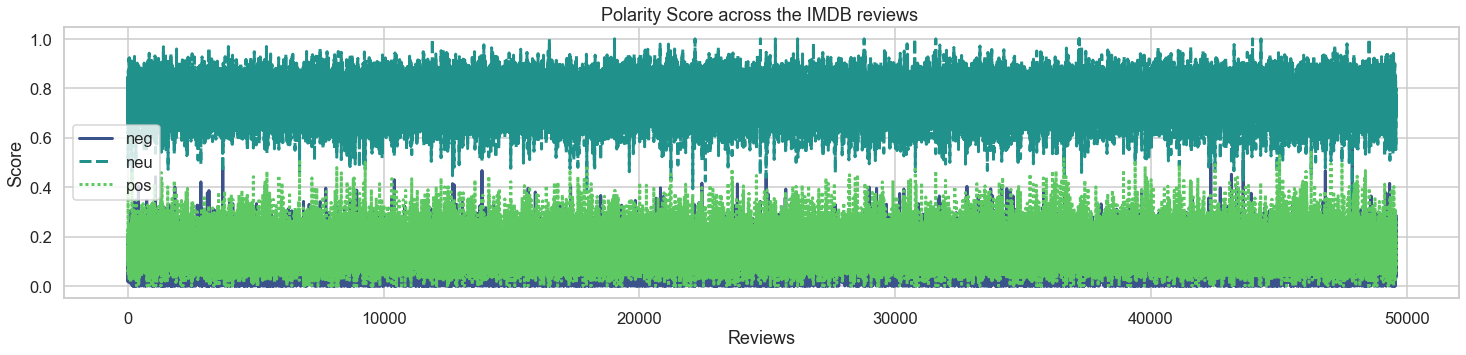

In [ ]:
plt.figure(figsize=(25,5))
sns.lineplot(data=[scores.neg,scores.neu,scores.pos],palette="viridis")
plt.title("Polarity Score across the IMDB reviews ")
plt.xlabel("Reviews")
plt.ylabel("Score")
plt.savefig("polarity.png",dpi=800,format="png",transparent=False)
# scores.neg.plot(kind="line")

In [ ]:
pd.concat([movies,scores],axis=1)

,review,sentiment,review_nopunc,review_clean,length,neg,neu,pos,compound
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, reviewers, mentioned, watching, 1, oz, e...",1761,0.196,0.748,0.056,-0.9947
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...,"[wonderful, little, production, br, br, filmin...",998,0.052,0.765,0.182,0.9693
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su...",926,0.106,0.666,0.227,0.9712
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, theres, family, little, boy, jake,...",748,0.134,0.785,0.081,-0.8858
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, time, money, visually,...",1317,0.052,0.801,0.147,0.9744
...,...,...,...,...,...,...,...,...,...
49577,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,"[thought, movie, right, good, job, wasnt, crea...",1008,0.047,0.753,0.199,0.9890
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,"[bad, plot, bad, dialogue, bad, acting, idioti...",642,0.166,0.720,0.114,-0.6693
49579,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,"[catholic, taught, parochial, elementary, scho...",1280,0.208,0.683,0.108,-0.9851
49580,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...,"[im, going, disagree, previous, comment, side,...",1234,0.117,0.801,0.081,-0.8657


Everything now is set up to start analyzing different topics over the reviews. More mining and data extraction could be done upon the information we have so far. By associating synonym words to different sentiments, more experimentation could be done to refine what could be infered and extrapolated. 

We can create a data frame that provides information about the words used over the corpus. This will let us know which are the words that potentially could represent possible topics or themes mentioned over a review. For example, these are the 20 most used words and their *Part of Speech* tag over the first 20,000 reviews on the IMDB data set.

In [ ]:
most_common = nltk.FreqDist(bag_of_words)
freq_df = pd.DataFrame(most_common.most_common(10001),columns=["word","frequency"])
freq_df["pos_tag"] = freq_df.word.apply(lambda x: nltk.pos_tag([x])[0][1])
freq_df[1:20]

,word,frequency,pos_tag
1,movie,49744,NN
2,film,46205,NN
3,one,26606,CD
4,make,22137,VB
5,like,21605,IN
6,see,20352,VB
7,good,20009,JJ
8,get,17733,VB
9,time,14857,NN
10,character,13776,NN


## Sources

    KG:     https://www.youtube.com/watch?v=M9Itm95JzL0   (watched this completely)
    KG:     https://www.youtube.com/watch?v=vyOgWhwUmec
    FCC:    https://www.youtube.com/watch?v=X2vAabgKiuM
    DS:     https://www.youtube.com/watch?v=hHr_cBKkRfQ
    SDX:    https://www.youtube.com/playlist?list=PLQVvvaa0QuDf2JswnfiGkliBInZnIC4HL
    PyO:    https://www.youtube.com/watch?v=xvqsFTUsOmc

    https://www.kdnuggets.com/2019/01/solve-90-nlp-problems-step-by-step-guide.html


## Next steps and crazy ideas to work on.

### Text Generation

    https://www.youtube.com/watch?v=MGVdu39gT6k
    https://www.youtube.com/watch?v=NYkbqzTlW3w
    https://www.youtube.com/watch?v=VAMKuRAh2nc (This one is a GREAT video tutorial using Deep Learning)

### Synonym and Antonym tagging for emotion analysis over WordNet Model.

In [ ]:
syns = wordnet.synsets("happy")
print(syns)

[Synset('happy.a.01'), Synset('felicitous.s.02'), Synset('glad.s.02'), Synset('happy.s.04')]


## Model testing

#### The following code snipets are merely for testing purposes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import pickle

sns.set_style("darkgrid")

with open('pickle_model.pickle', 'rb') as g:
    loaded_model = pickle.load(g)

# movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()
movies = pd.read_csv("clean_movies_database.csv").drop_duplicates()
movies

,review,sentiment,review_nopunc,review_clean
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"['one', 'reviewers', 'mentioned', 'watching', ..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...,"['wonderful', 'little', 'production', 'br', 'b..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"['thought', 'wonderful', 'way', 'spend', 'time..."
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"['basically', 'theres', 'family', 'little', 'b..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"['petter', 'matteis', 'love', 'time', 'money',..."
...,...,...,...,...
49577,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,"['thought', 'movie', 'right', 'good', 'job', '..."
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,"['bad', 'plot', 'bad', 'dialogue', 'bad', 'act..."
49579,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,"['catholic', 'taught', 'parochial', 'elementar..."
49580,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...,"['im', 'going', 'disagree', 'previous', 'comme..."


In [ ]:
X = movies.review
y = movies.sentiment
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")

vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

predictions = loaded_model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {loaded_model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.



ValueError: X.shape[1] = 101583 should be equal to 122703, the number of features at training time

## Predictions

#### Set up different variables to fine tune the model

In [ ]:
from sklearn.model_selection import train_test_split

X = movies.review
y = movies.sentiment
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

from sklearn.metrics import classification_report
predictions = loaded_model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {loaded_model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.93      0.96      0.95      4850
    positive       0.96      0.93      0.95      5067

    accuracy                           0.95      9917
   macro avg       0.95      0.95      0.95      9917
weighted avg       0.95      0.95      0.95      9917



In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
X=movies.review
y=movies.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X_train)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")


model = TfidfTransformer()
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
# print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))



Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      TfidfTransformer()

Model fitted with training vectors.



AttributeError: 'TfidfTransformer' object has no attribute 'predict'